# Create electricity prices

Day-ahead Price [EUR/MWh], converted to [EUR/kWh]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

current_folder = 'drive/My Drive/DAI-Labor/RL_VPP_Thesis/data/'

input_folder = current_folder + 'datasets/'
output_folder = current_folder + 'scenario_datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import math

In [ ]:
#prices_data = pd.read_csv(input_folder + 'Day-ahead Prices_202201010000-202301010000.csv')
prices_data = pd.read_csv(input_folder + 'Day-ahead Prices_201701010000-201801010000.csv')

prices_data.head()
#prices_data.info()

,MTU (CET/CEST),Day-ahead Price [EUR/MWh],Currency,BZN|DE-AT-LU
0,01.01.2017 00:00 - 01.01.2017 01:00,20.96,EUR,NaN
1,01.01.2017 01:00 - 01.01.2017 02:00,20.90,EUR,NaN
2,01.01.2017 02:00 - 01.01.2017 03:00,18.13,EUR,NaN
3,01.01.2017 03:00 - 01.01.2017 04:00,16.03,EUR,NaN
4,01.01.2017 04:00 - 01.01.2017 05:00,16.43,EUR,NaN


In [ ]:
prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MTU (CET/CEST)             8761 non-null   object 
 1   Day-ahead Price [EUR/MWh]  8760 non-null   float64
 2   Currency                   8760 non-null   object 
 3   BZN|DE-AT-LU               0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 273.9+ KB


In [ ]:
prices_data["MTU (CET/CEST)"] = prices_data["MTU (CET/CEST)"].str.slice(start=0, stop=16)
prices_data.rename(columns = {'MTU (CET/CEST)':'time'}, inplace = True)
prices_data['time'] = pd.to_datetime(prices_data['time'])
#prices_data['time'] = pd.to_datetime(prices_data['time'], unit='ms')
#COnversion from EUR/MWh to EUR/kWh
prices_data.rename(columns = {'Day-ahead Price [EUR/MWh]':'EUR/kWh'}, inplace = True)
# prices_data['EUR/kWh'] = prices_data['EUR/kWh'].astype(float) / 1000
prices_data['EUR/kWh'] = pd.to_numeric(prices_data['EUR/kWh'],errors='coerce') / 1000
#pd.to_numeric(df['DataFrame Column'],errors='coerce')

#prices_data = prices_data.drop(['BZN|DE-LU'], axis=1)
prices_data = prices_data.drop(['BZN|DE-AT-LU'], axis=1)
prices_data = prices_data.drop(['Currency'], axis=1)

index = len(prices_data['time'])
#timestamp = pd.to_datetime("2023-01-01 00:00:00", format="%Y-%m-%d %H:%M:%S")
timestamp = pd.to_datetime("2018-01-01 00:00:00", format="%Y-%m-%d %H:%M:%S")
last_value = prices_data['EUR/kWh'][index-1]
new_row = pd.DataFrame([[timestamp, last_value]], columns=["time",'EUR/kWh'], index=[index])
prices_data = pd.concat([prices_data, pd.DataFrame(new_row)], ignore_index=False)

prices_data.head()

,time,EUR/kWh
0,2017-01-01 00:00:00,0.02096
1,2017-01-01 01:00:00,0.02090
2,2017-01-01 02:00:00,0.01813
3,2017-01-01 03:00:00,0.01603
4,2017-01-01 04:00:00,0.01643


In [ ]:
prices_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8762 entries, 0 to 8761
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     8762 non-null   datetime64[ns]
 1   EUR/kWh  8761 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 205.4 KB


In [ ]:
""" prices_data = prices_data.resample('60min', on='time').agg({'time':'min','EUR/kWh':'min'})

prices_data['time'] = prices_data.index.values
prices_data['EUR/kWh'].fillna(method='ffill', inplace=True)
prices_data.head() """

prices_data = prices_data.resample('15min', on='time').agg({'time':'min','EUR/kWh':'min'})

prices_data['time'] = prices_data.index.values
prices_data['EUR/kWh'].fillna(method='ffill', inplace=True)
prices_data.head()
#print(time_sampled)

,time,EUR/kWh
time,,
2017-01-01 00:00:00,2017-01-01 00:00:00,0.02096
2017-01-01 00:15:00,2017-01-01 00:15:00,0.02096
2017-01-01 00:30:00,2017-01-01 00:30:00,0.02096
2017-01-01 00:45:00,2017-01-01 00:45:00,0.02096
2017-01-01 01:00:00,2017-01-01 01:00:00,0.02090


In [ ]:
prices_data.tail()

,time,EUR/kWh
time,,
2017-12-31 23:00:00,2017-12-31 23:00:00,-0.00092
2017-12-31 23:15:00,2017-12-31 23:15:00,-0.00092
2017-12-31 23:30:00,2017-12-31 23:30:00,-0.00092
2017-12-31 23:45:00,2017-12-31 23:45:00,-0.00092
2018-01-01 00:00:00,2018-01-01 00:00:00,-0.00092


In [ ]:
prices_data = prices_data.loc['2017-01-01 00:00:00':'2018-01-01 00:00:00']
prices_data.info()

# prices_data = prices_data.loc['2022-01-01 00:00:00':'2023-01-01 00:00:00']
# prices_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   time     35041 non-null  datetime64[ns]
 1   EUR/kWh  35041 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 821.3 KB


In [ ]:
prices_csv = prices_data.to_csv(output_folder + 'market_prices_load_test_year_15.csv', index = True)

In [ ]:
#prices_data = prices_data.iloc[:,:1]

prices_data = prices_data.drop(['time'], axis=1)
#df_2 = df.iloc[1000:,:]
#print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))
prices_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/kWh  35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


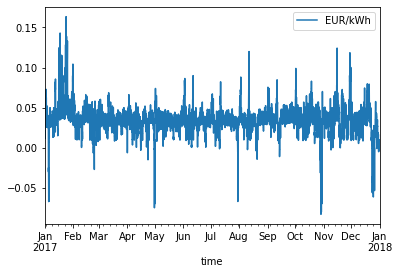

In [ ]:
prices_data.plot()
#prices_data.plot(legend=None)
#plt.show()